# Customer Behavior Analysis 
### Customer Behavior Analysisis the process of examining how customers interact with a product, service, or platform to understand their actions, preferences, and decision-making processes.

We have a dataset that captures the behavior of e-commerce customers. The dataset contains the following columns:

- User_ID: Unique identifier for each customer.
- Gender: Gender of the customer (e.g., Male, Female).
- Age: Age of the customer.
- Location: Location of the customer.
- Device_Type: Type of device used for browsing (e.g., Mobile, Tablet, Desktop).
- Product_Browsing_Time: Amount of time spent browsing products (in minutes).
- Total_Pages_Viewed: Total number of pages viewed during the browsing session.
- Items_Added_to_Cart: Number of items added to the shopping cart.
- Total_Purchases: Total number of purchases made.

Here we will:

- Understanding the distribution and characteristics of customer demographics (e.g., age, gender, location).
- Exploring how different types of devices are used by customers and their impact on behavior.
- Investigating the relationship between browsing time, pages viewed, items added to the cart, and actual purchases.
- Segmenting customers based on their behavior and identifying distinct customer groups.
- Analyzing the customer journey and identifying potential areas for improvement in the conversion funnel.
- Assessing the impact of customer behavior on revenue generation and identifying opportunities for increasing sales and customer engagement.

In [92]:
#Importing Libraries and reading the data
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("C:/Users/Shristi Sharma/Downloads/ecommerce_customer_data.csv")
print(data.head())

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


In [10]:
# Summary statistics for numeric columns
numeric_summary = data.describe()
print(numeric_summary)

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

In [11]:
# Summary for non-numeric columns
categorical_summary = data.describe(include='object')
print(categorical_summary)

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


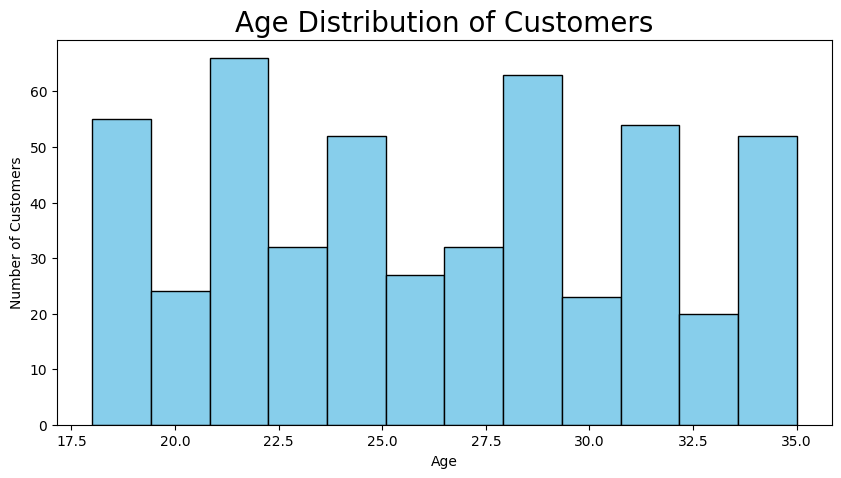

In [32]:
# Create a histogram for Age distribution
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins= 12, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers', size= 20)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

The histogram shows that most customers are between the ages of 18 and 28, with noticeable peaks around 20–22 and 26–28, indicating a strong presence of younger adults on the platform. There are slight dips around ages 24 and 29–30, but overall, the age distribution is fairly balanced across the 18–35 range. This suggests the platform appeals primarily to Gen Z and young millennials, which can influence marketing strategies, product offerings, and user experience design to better suit this demographic.


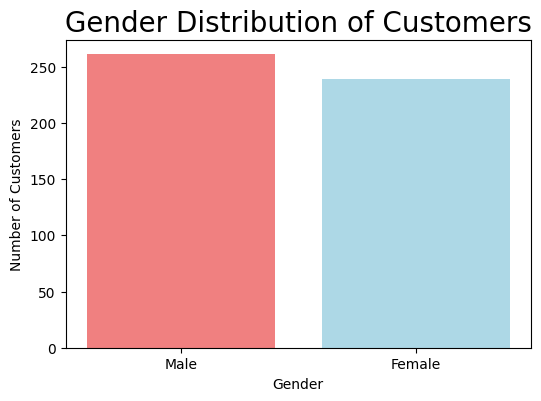

In [72]:
# Count the number of customers by gender
gender_counts = data['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['lightcoral', 'lightblue'])
plt.title('Gender Distribution of Customers', size= 20)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

The bar chart shows a slightly higher number of male customers compared to female customers, indicating a relatively balanced gender distribution with a slight male majority. This suggests that the platform appeals to both genders fairly equally, and marketing or product strategies do not need major adjustments to target one gender over the other.


# Analyzing Customer Behaviour

Now, let’s have a look at the relationship between the product browsing time and the total pages viewed:

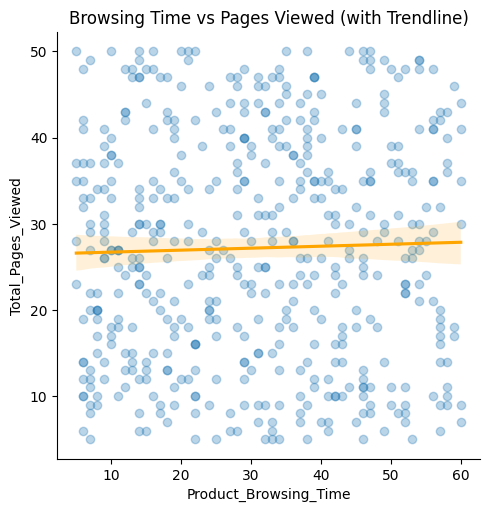

In [99]:
x = data['Product_Browsing_Time']
y = data['Total_Pages_Viewed']

# Fit a linear trendline
coeffs = np.polyfit(x, y, 1)
trendline = np.poly1d(coeffs)

sns.lmplot(x='Product_Browsing_Time', y='Total_Pages_Viewed', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})
plt.title("Browsing Time vs Pages Viewed (with Trendline)")
plt.show()

The scatter plot reveals no clear pattern or strong correlation between the time spent browsing products and the total number of pages viewed. This suggests that users who spend more time on the website aren't necessarily viewing more pages. Various factors could contribute to this, such as website layout, content relevance, or differences in user behavior and preferences.

Now, let’s have a look at the average total pages viewed by gender:

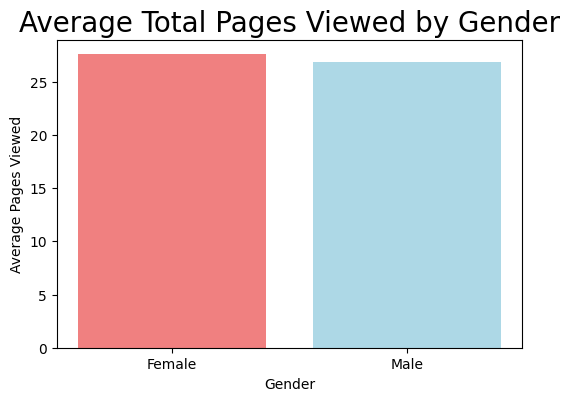

In [70]:
# Grouped analysis: average total pages viewed by gender
avg_pages_by_gender = data.groupby('Gender')['Total_Pages_Viewed'].mean().round(2)

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(avg_pages_by_gender.index, avg_pages_by_gender.values, color=['lightcoral', 'lightblue'])
plt.title('Average Total Pages Viewed by Gender', size= 20)
plt.xlabel('Gender')
plt.ylabel('Average Pages Viewed')
plt.show()

The bar chart shows that female customers, on average, view slightly more pages than male customers. While the difference is not substantial, it suggests that female users may engage more deeply with the platform’s content, possibly reflecting higher interest or a more thorough browsing behavior.


Now, let’s have a look at the average total pages viewed by devices:

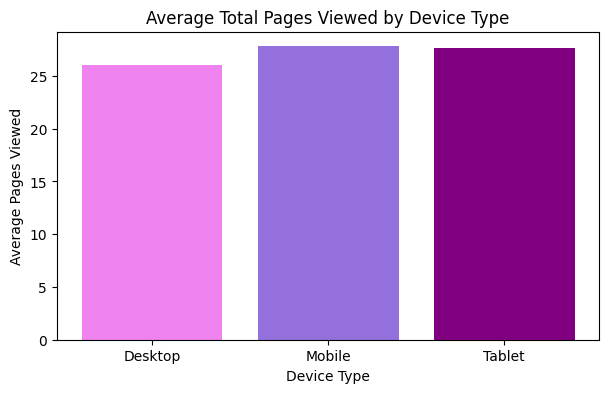

In [116]:
# Grouped analysis: average total pages viewed by device type
avg_pages_by_device = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().round(2)

# Plotting the bar chart
plt.figure(figsize=(7, 4))
plt.bar(avg_pages_by_device.index, avg_pages_by_device.values, color=['violet', 'mediumpurple', 'purple'])
plt.title('Average Total Pages Viewed by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Pages Viewed')
plt.show()

The bar chart indicates that customers using mobile and tablet devices view slightly more pages on average than those using desktops. While the differences are small, it suggests that mobile and tablet users may be more engaged or find the platform easier to navigate on these devices, highlighting the importance of optimizing the mobile and tablet user experience.


Now, let’s calculate the customer lifetime value and visualize segments based on the customer lifetime value:

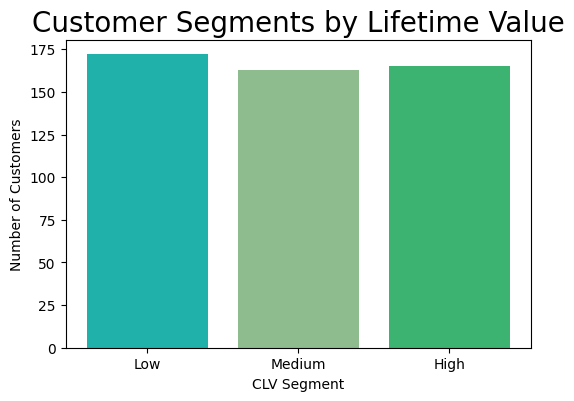

In [80]:
# Calculate simple CLV
data['CLV'] = data['Total_Purchases'] * data['Total_Pages_Viewed']

# Segment by CLV
data['CLV_Segment'] = pd.qcut(data['CLV'], q=3, labels=['Low', 'Medium', 'High'])

# Count of each segment
clv_segment_counts = data['CLV_Segment'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(clv_segment_counts.index, clv_segment_counts.values, color=['lightseagreen', 'darkseagreen', 'mediumseagreen'])
plt.title('Customer Segments by Lifetime Value', size= 20)
plt.xlabel('CLV Segment')
plt.ylabel('Number of Customers')
plt.show()

The bar chart titled **"Customer Segments by Lifetime Value"** shows the distribution of customers across three CLV (Customer Lifetime Value) segments: Low, Medium, and High. Interestingly, the **Low CLV segment has the highest number of customers**, slightly above 170, indicating that a significant portion of the customer base generates lower lifetime value. The **Medium and High segments have nearly equal numbers**, both slightly below the Low segment, suggesting a relatively balanced distribution between medium and high-value customers. This insight highlights an opportunity for businesses to **strategically nurture and convert low CLV customers into higher value segments** through targeted marketing and engagement strategies.


Now, let’s have a look at the conversion funnel of the customers:

In [83]:
# Funnel analysis
funnel_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion Funnel')
fig.show()



In the above graph, the x-axis represents the time customers spend browsing products on the e-commerce platform. The y-axis represents the number of items added to the shopping cart by customers during their browsing sessions.

Now, let’s have a look at the churn rate of the customers:

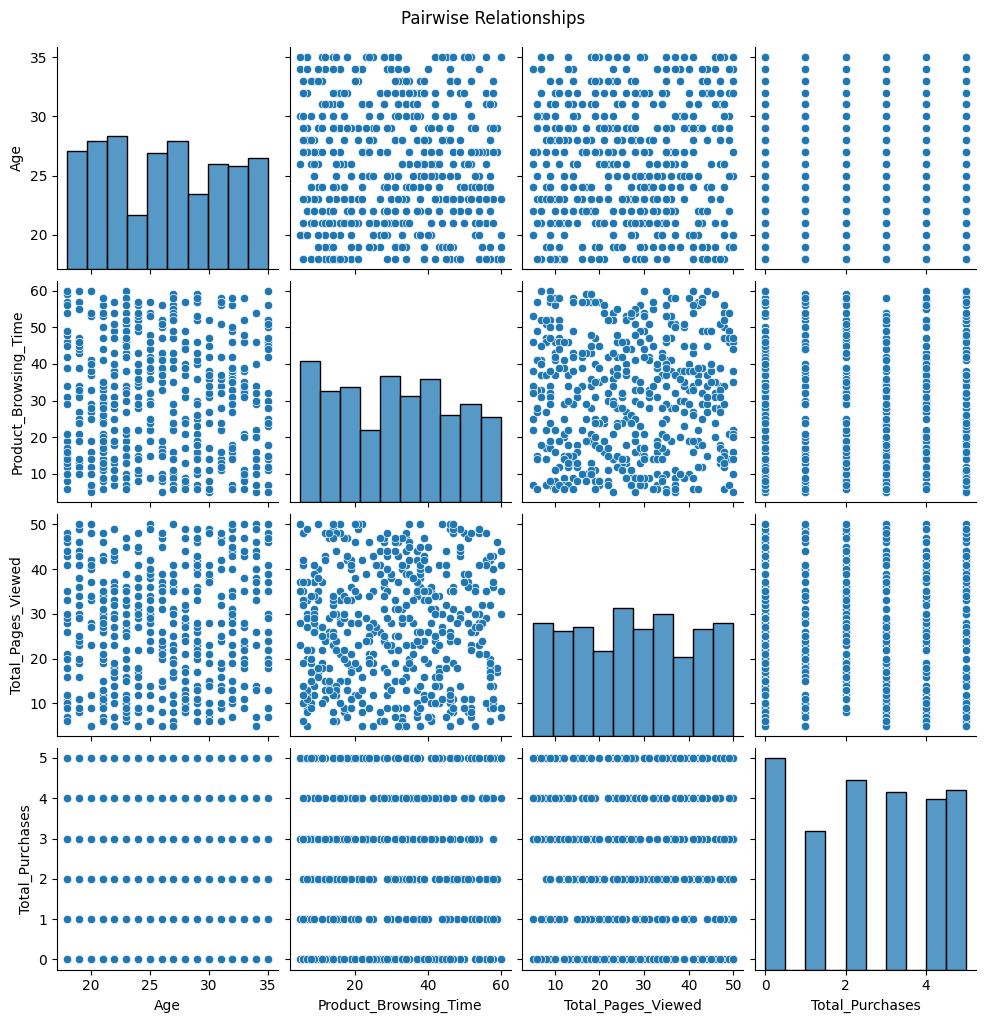

In [100]:
sns.pairplot(data[['Age', 'Product_Browsing_Time', 'Total_Pages_Viewed', 'Total_Purchases']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [101]:
# Calculate churn rate
data['Churned'] = data['Total_Purchases'] == 0

churn_rate = data['Churned'].mean()
print(churn_rate*100)

19.8


A churn rate of 19.8% indicates that a significant portion of customers has churned, and addressing this churn is important for maintaining business growth and profitability.

# Summary

Customer Behavior Analysis is a process that involves examining and understanding how customers interact with a business, product, or service. This analysis helps organizations make informed decisions, tailor their strategies, and enhance customer experiences. I hope you liked this article on Customer Behaviour Analysis using Python. Feel free to ask valuable questions

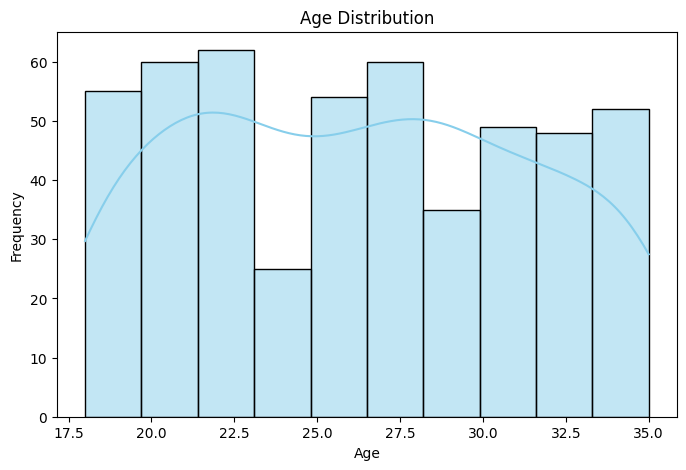

In [93]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


C:\Users\Shristi Sharma\AppData\Local\Temp\ipykernel_18752\2963626890.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




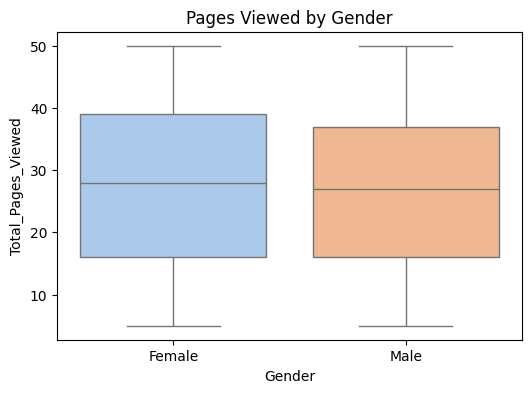

In [94]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Total_Pages_Viewed', data=data, palette='pastel')
plt.title("Pages Viewed by Gender")
plt.show()


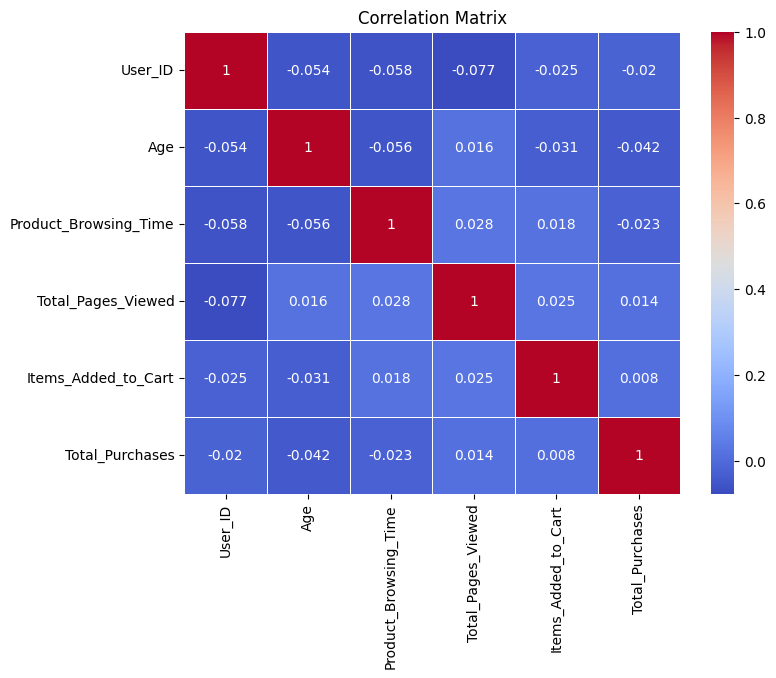

In [95]:
plt.figure(figsize=(8,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


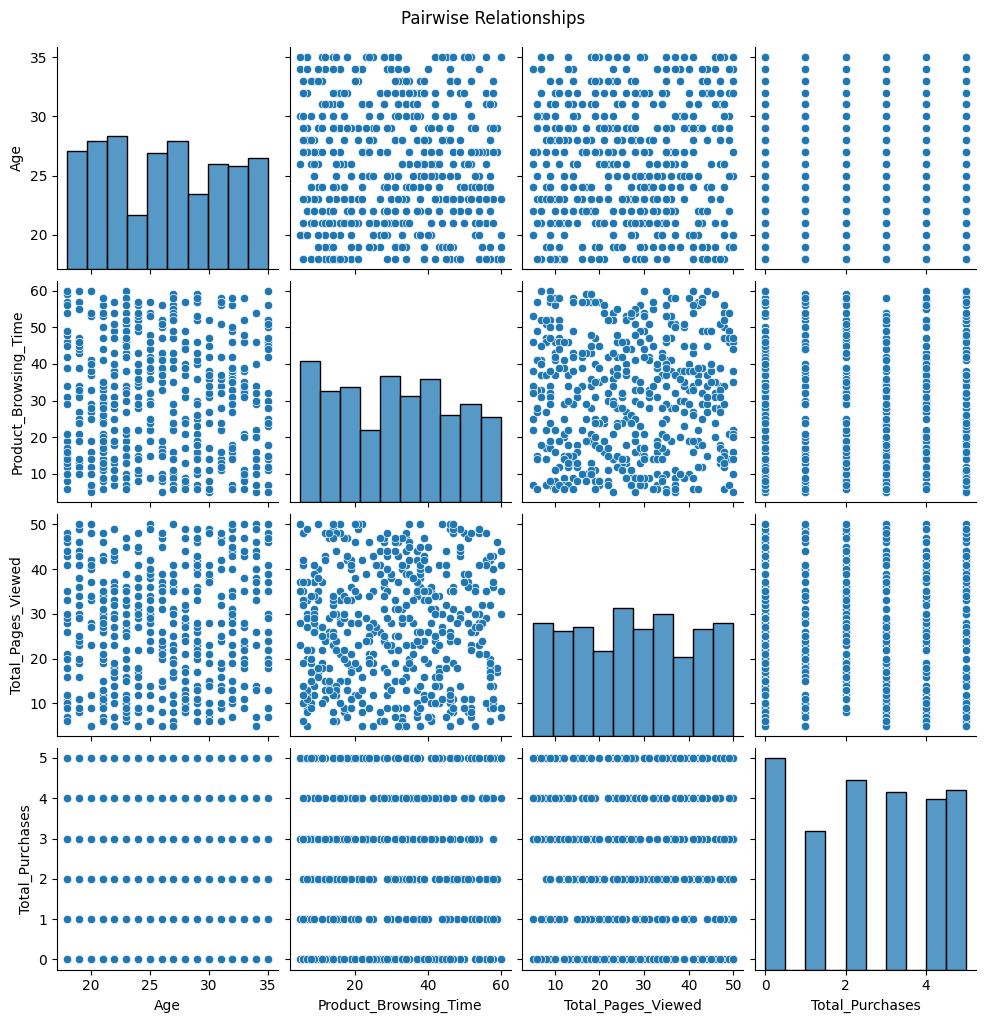